<a href="https://colab.research.google.com/github/burnassun/MNIST-Digit-Classifier-Detecting-the-Digit-2-Using-Logistic-Regression/blob/main/hdr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fetching data set


In [ ]:
from sklearn.datasets import fetch_openml


In [ ]:
mnist=fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x,y=mnist['data'],mnist['target']

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
some_digit=x.iloc[36000]
some_digit_image=some_digit.values.reshape(28,28)

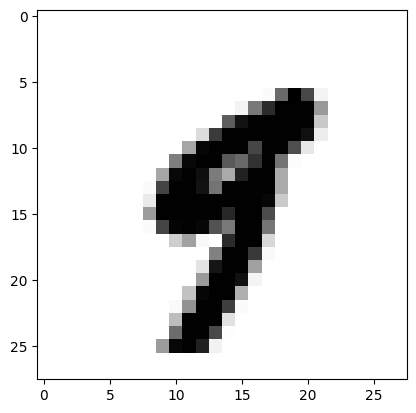

In [ ]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')

In [ ]:
x_train , x_test =x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]

In [ ]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

creating a 2 detector

In [ ]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)

y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [ ]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
clf.fit(x_train,y_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
clf.predict([some_digit])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [ ]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
a.mean()

0.97845